In [1]:
from LIMxCMBL.init import *
from LIMxCMBL.experiments import *

In [3]:
from scipy.interpolate import interp1d
dchidz = np.gradient(chis, zs)
f_dchidz = interp1d(x = zs, y = dchidz)

In [4]:
rest_freqs = {}
rest_freqs['CII'] = nu_CII.to(u.Hz)
rest_freqs['CO']  = nu_CO.to(u.Hz)
rest_freqs['Lya'] = nu_Lya.to(u.Hz)
rest_freqs['HI']  = nu_HI.to(u.Hz)

$$R = \nu / d\nu \Rightarrow \nu/R = d\nu = d\chi \frac{d\nu}{d\chi}\Rightarrow d\chi = \frac {\nu } R \frac {d\chi}{d\nu}=\frac 1 R \frac 1 {1+z} \frac{d\chi}{dz}$$

kperp 0.015242906042841228 12.182929644874559
kpar 0.0028436648018537168 9.578024740378504
0.522750089645401


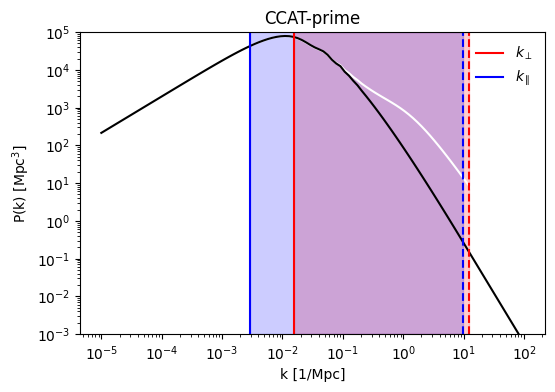

kperp 0.035483562653240354 1.3211585696196084
kpar 0.006147735448202755 19.360679287697252
1.1865749097953133


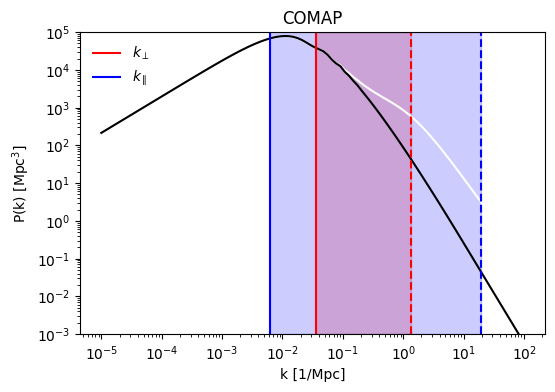

kperp 0.002946200634182617 24.999341365999623
kpar 0.005299415759786455 18.340487386301366
0.451650824763221


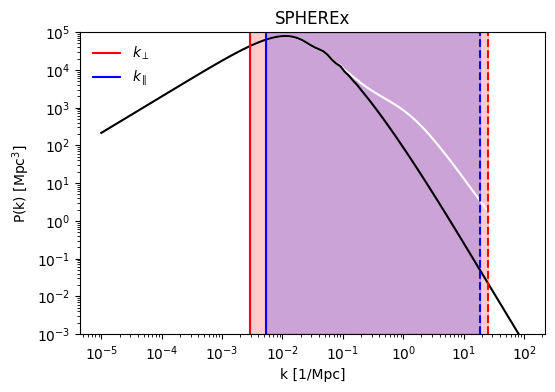

kperp 0.003348970988773165 69.60705486755162
kpar 0.0035013720817553785 17.024193808814186
1.2802250302739768


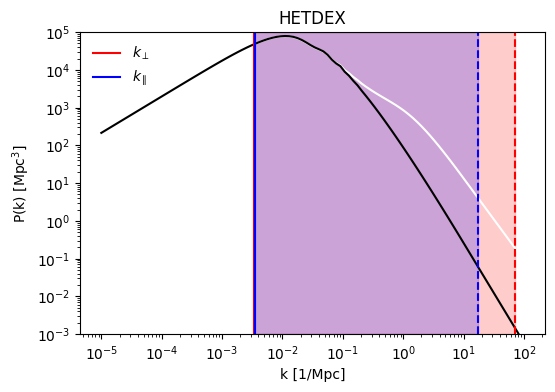

kperp 0.0005433857726086796 0.1435094067532816
kpar 0.009165824419057661 2.350402738035007
2.6732377415593374


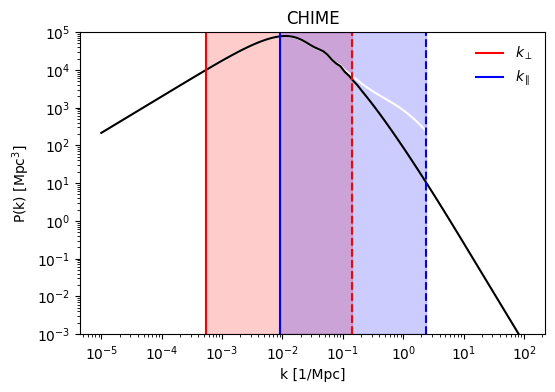

In [27]:
import matplotlib.pyplot as plt

ks = np.logspace(-5, 2, 100)



for experiment in experiments:
    plt.figure(facecolor='w', dpi=100)
    zmin = experiments[experiment]['zmin']
    zmax = experiments[experiment]['zmax']
    zcentral = (zmin + zmax) / 2
        
    chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
    chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))
    chicentral = ccl.comoving_angular_distance(cosmo, 1/(1+zcentral))
    
    
    
    R = experiments[experiment]['R']
    dchi_central = 1/(1+zcentral) / R * f_dchidz(zcentral)

    if(experiment == 'CHIME'):
        dchi_central = (zmax - zmin)/256 * f_dchidz(zcentral)
        
    Omega_field  =  experiments[experiment]['Omega_field'] #rad^2
    
    kpar_fundamental = 2*np.pi/(chimax - chimin)
    kpar_max_survey = 2 * np.pi / dchi_central
    
    ell_fundamental = np.sqrt((2*np.pi)**2 / Omega_field.to(u.rad**2))
    ell_fundamental = np.array(ell_fundamental)
    
    ell_max_survey = np.sqrt((2*np.pi)**2 / experiments[experiment]['Omega_pix'].to(u.rad**2))
    ell_max_survey = np.array(ell_max_survey)
    

    kperp_min = ell_fundamental/chicentral
    kperp_max = ell_max_survey/chicentral
    
    
    plt.plot(ks, ccl.nonlin_matter_power(cosmo,ks, 1), c='white')
    plt.plot(ks, ccl.linear_matter_power(cosmo,ks, 1), c='k')

    print('kperp', kperp_min, kperp_max)
    plt.axvline(kperp_min, c='r', label=r'$k_\perp$')
    plt.axvline(kperp_max, c='r', ls='--')
    plt.fill_between([kperp_min, kperp_max], [1e-3, 1e-3], [1e5, 1e5], color='r', alpha = 0.2)
    
    print('kpar', kpar_fundamental, kpar_max_survey)
    plt.axvline(kpar_fundamental, c='b', label=r'$k_\parallel$')
    plt.axvline(kpar_max_survey, c='b', ls='--')
    plt.fill_between([kpar_fundamental, kpar_max_survey], [1e-3, 1e-3], [1e5, 1e5], color='b', alpha = 0.2)
    
    print(.3/256 * f_dchidz(zcentral))
    
    plt.loglog()
    plt.title(experiment)
    plt.ylim(1e-3, 1e5)
    plt.legend(frameon=False)
    plt.ylabel(r'P(k) [Mpc${}^3$]')
    plt.xlabel('k [1/Mpc]')
    plt.show()